# ObsID : 0945010135, SRCNUM : 35, Instru : EPN
Not on Simbad.

## ESASky
https://sky.esa.int/esasky/?target=53.64433333333333%20-27.827944444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033434.6-274942
- RA : 03h 34m 34.643s
- DEC : -27° 49' 42.15"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [4]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945010135_SRCNUM35_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.869e-02 +/- 2.080e-03 (74.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.026e+04 sec
 Using fit statistic: chi
 Using Background File                PNbackground_spectrum.fits
  Background Exposure Time: 1.026e+04 sec
 Using Response (RMF) File            PN.rmf for Source 1
 Using Auxiliary Response (ARF) File  PN.arf



In [1]:
n_cts = 2.869e-02*1.026e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 294.3594


## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     2 channels (1-2) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 859.5, 661.5, -0.5)

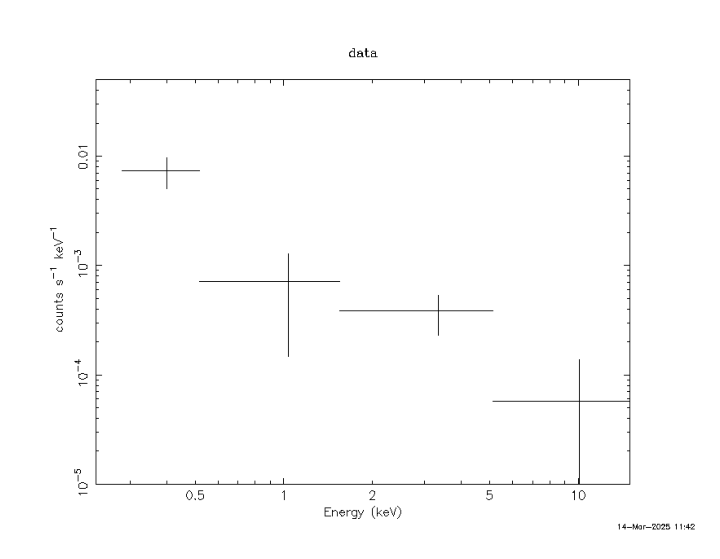

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.037725e+11     using 5 bins.

Tes

(-0.5, 861.5, 662.5, -0.5)

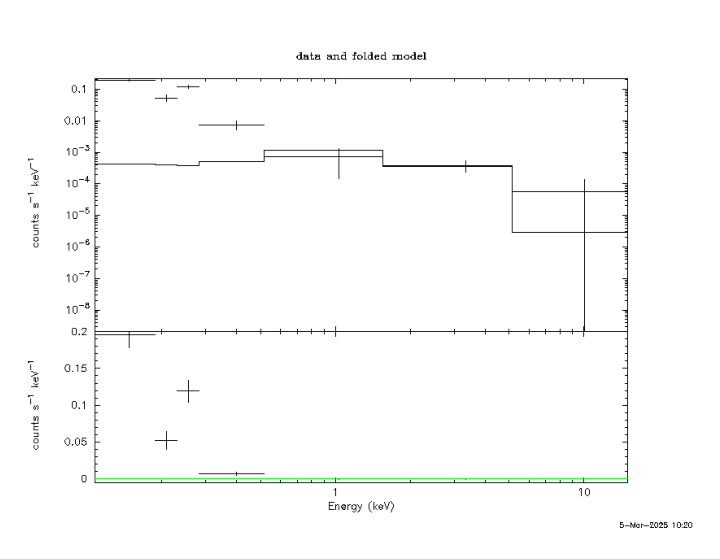

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.788834e+10     using 5 bins.

Test statistic : Chi-Squared              2.788834e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
74.9442      0.145521     -1      0.607377       8.48102   1.40117e-05
74.8544      659.513      -1      0.363114       21.3422   1.08473e-05
73.6076      33545.3      -1      0.109950       77.5855   1.38145e-05
70.

(-0.5, 861.5, 666.5, -0.5)

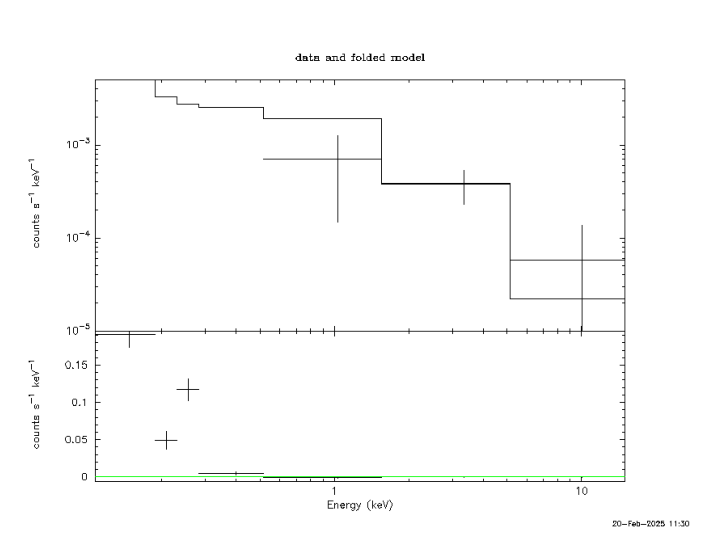

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.933514e+09     using 5 bins.

Test statistic : Chi-Squared              4.933514e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
75.791       0.997822     -2       1.21944       2.10699   4.3

(-0.5, 860.5, 661.5, -0.5)

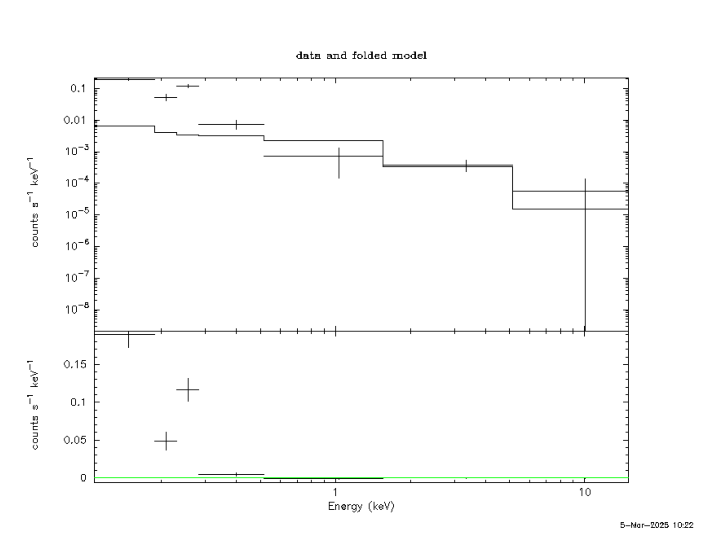

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.520312e+11     using 5 bins.

Test statistic : Chi-Squared              1.520312e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
74.353       0.167175     -3     0.0528851      0.107575   1.87967e-06
73.8537      205010        0    0.00815802      0.125906   1.89030e-06
73.8049      233740        0    0.00213107      0.146590   1.86795e-06
7

(-0.5, 860.5, 664.5, -0.5)

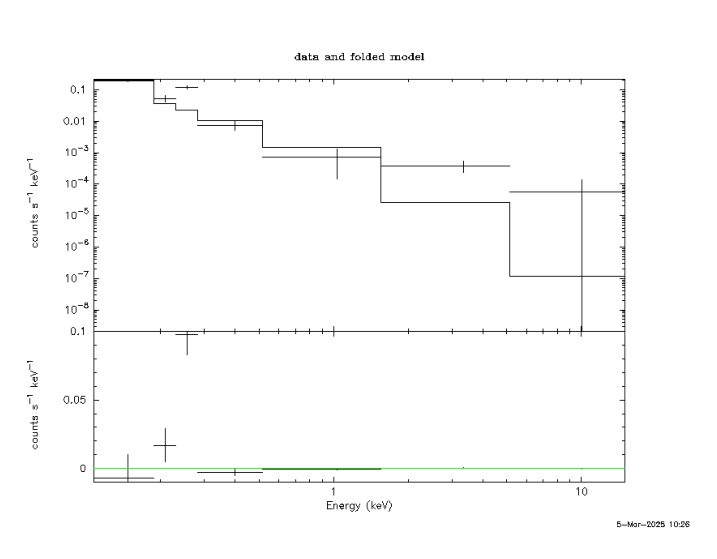

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
X-ray binaries

In [12]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.034914e+12     using 5 bins.

Test statistic : Chi-Squared              1.034914e+12     using 5 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
72.2926      11808.6      -1     0.0352422      

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 662.5, -0.5)

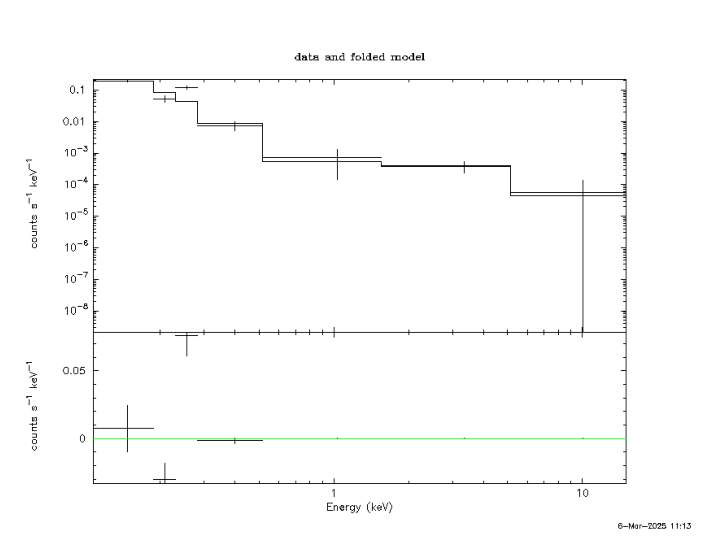

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung + Powerlaw model (Best fit)
Cataclismic variables

In [13]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.087102e+11     using 5 bins.

Test statistic : Chi-Squared              3.087102e+11     using 5 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
74.5839      1333.39      -2      0.305352     

GammQ: A <=  0
GammQ: A <=  0


 0.577327   4.19659e-06
73.0875      89177.4       0     0.0455078       199.065   1.93088e-08      0.632741   3.94911e-06
72.1822      37188.4       0     0.0102142       199.269   8.44552e-09      0.671107   3.72187e-06
72.0468      18777.3       0    0.00485364       199.345   3.26203e-09      0.695491   3.49539e-06
71.8292      62553.9       0    0.00109411       63.7951   1.59604e-07      0.705743   3.50955e-06
71.6692      63174         0   0.000177297       12.4369   2.66979e-07      0.717548   3.51972e-06
71.4827      70729.7       0   6.93759e-05       1.31995   3.41613e-07      0.729346   3.52461e-06
71.1797      103677        0   2.53121e-05      0.430841   8.85314e-07      0.694449   3.40390e-06
70.1261      100619        0   5.75429e-06      0.181779   6.13185e-06      0.664529   2.99199e-06
59.3009      117009        0   1.12710e-06      0.302780   3.84570e-05      0.524068   2.46138e-06
57.8396      151875        0   1.47082e-07      0.251009   3.58628e-05      0.321648 

(-0.5, 856.5, 662.5, -0.5)

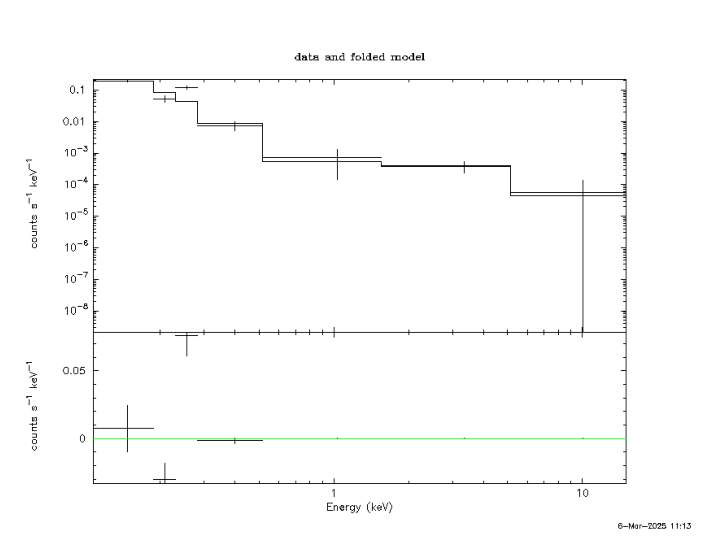

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model

In [14]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.973470e+10     using 5 bins.

Test statistic : Chi-Squared              1.973470e+10     using 5 bins.
 Cannot calculate null hypothe

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 855.5, 661.5, -0.5)

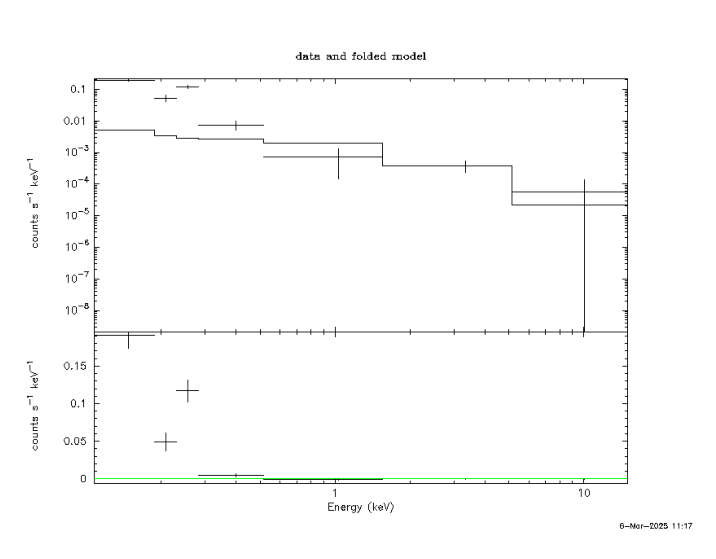

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apecapec.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 53.6443467°
- DEC = -27.8283748°

53.64 -27.83

**Column density :** nH = 2*10^20 cm^-2

In [15]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")

The different models give a column density of :

bbody
(tbabs) : 6667.306595011633

bremss
(tbabs) : 2474783.0146012693

apec
(tbabs) : 168880.8026798477

powerlaw
(tbabs) : 37880.10864152983

bbody+powerlaw
(tbabs) : 507516.71786729776

bremss+powerlaw
(tbabs) : 72202.29116356526

apec+apec
(tbabs) : 1802916748922.4734


## Flux
### X-ray flux

In [16]:
AllModels.calcFlux(".2 12.0")

 Model Flux  2.31e-05 photons (7.9192e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [17]:
Flux = 7.9192e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 7.9192e-14 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [18]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### Ratio F_x-ray/F_optical

In [19]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 1.4371166207328117
F_x-ray = 1.4371166207328117*F_optical


## Luminosity
No distance available on ESASky.

In [20]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [9.47542233503494e+24, 9.475422335034939e+30] erg/s
For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [9.47542233503494e+36, 9.475422335034942e+44] erg/s


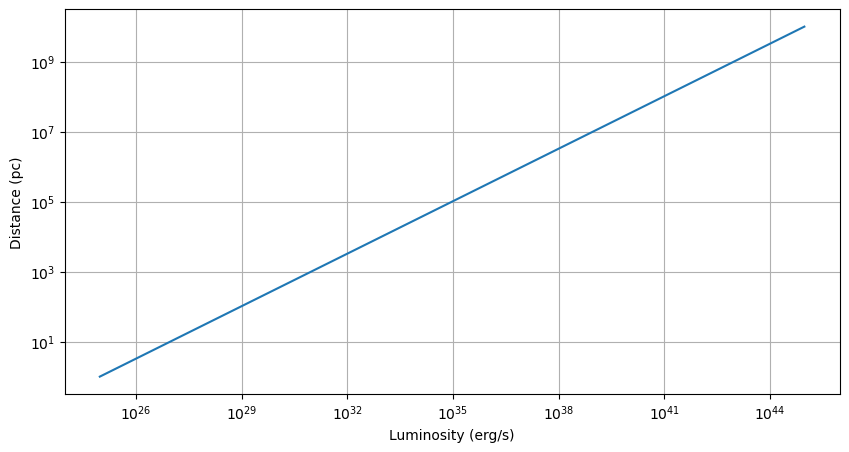

In [21]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()